<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB2/blob/main/6351071072_LAB2_BAI2_TRANG1516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Định nghĩa tên cột (do file gốc không có header chuẩn)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

In [3]:
# bài 2 câu 1 trang 15 16

df_train = pd.read_csv('adult.data.csv', header=0, na_values=['?', ' ?'], skipinitialspace=True)
df_test = pd.read_csv('adult.test.csv', header=0, na_values=['?', ' ?'], skipinitialspace=True)

# Chuẩn hóa tên cột: Đổi 'income' thành 'Income' (viết hoa)
df_train.rename(columns={'income': 'Income'}, inplace=True)
df_test.rename(columns={'income': 'Income'}, inplace=True)

# Xóa dữ liệu trống
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

print(f"Number of training data: {len(df_train)}")
print(f"Number of test data: {len(df_test)}")

print("Nguyễn Đức Trung - 6351071072")

Number of training data: 30162
Number of test data: 15060
Nguyễn Đức Trung - 6351071072


In [4]:
# bài 2 câu 2 trang 15 16

# 1. Xóa cột 'fnlwgt' (Chỉ xóa nếu nó tồn tại)
if 'fnlwgt' in df_train.columns:
    df_train.drop('fnlwgt', axis=1, inplace=True)

# File test của bạn vốn dĩ không có cột fnlwgt, nhưng code này vẫn an toàn
if 'fnlwgt' in df_test.columns:
    df_test.drop('fnlwgt', axis=1, inplace=True)

# 2. Xử lý cột Income (Xóa dấu chấm nếu có)
# Ép kiểu string trước để tránh lỗi
df_test['Income'] = df_test['Income'].astype(str).str.replace('.', '', regex=False)

# Lưu độ dài tập train (QUAN TRỌNG cho câu 6)
len_train = len(df_train)

# 3. Nối dữ liệu
# Chỉ lấy các cột chung giữa 2 file để tránh lệch cột
common_cols = [col for col in df_train.columns if col in df_test.columns]
data = pd.concat([df_train[common_cols], df_test[common_cols]], axis=0, ignore_index=True)

print("Sau khi tiền xử lý nối hai phần dữ liệu vào biến data sẽ nhận được khối dữ liệu có thông tin như sau")
data.info()

print("Nguyễn Đức Trung - 6351071072")

Sau khi tiền xử lý nối hai phần dữ liệu vào biến data sẽ nhận được khối dữ liệu có thông tin như sau
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  Income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB
Nguyễn Đức Trung - 6351071072


Ma trận tương quan giữa các thuộc tính:
                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.037623      0.079683      0.059351   
education-num   0.037623       1.000000      0.126907      0.081711   
capital-gain    0.079683       0.126907      1.000000     -0.032102   
capital-loss    0.059351       0.081711     -0.032102      1.000000   
hours-per-week  0.101992       0.146206      0.083880      0.054195   

                hours-per-week  
age                   0.101992  
education-num         0.146206  
capital-gain          0.083880  
capital-loss          0.054195  
hours-per-week        1.000000  


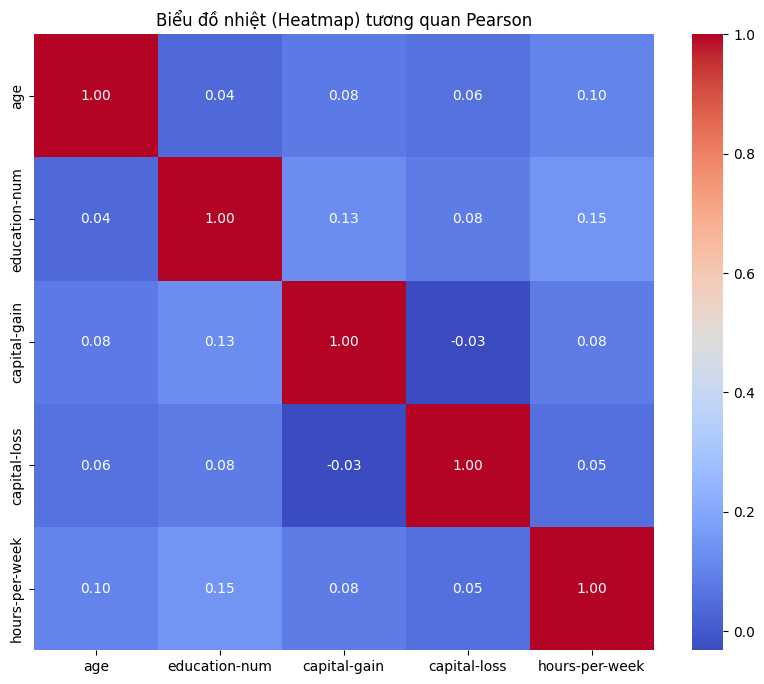

Không có cột nào có độ tương đồng quá cao (> 0.9) để loại bỏ.
Nguyễn Đức Trung - 6351071072


In [5]:
# bài 2 câu 3 trang 15 16

# 1. Chọn các cột dữ liệu dạng số để tính toán
numeric_df = data.select_dtypes(include=[np.number])

# 2. Tính ma trận tương quan theo công thức Pearson
corr_matrix = numeric_df.corr(method='pearson')

print("Ma trận tương quan giữa các thuộc tính:")
print(corr_matrix)

# 3. Vẽ biểu đồ Heatmap để quan sát (giống hướng dẫn thực hành)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Biểu đồ nhiệt (Heatmap) tương quan Pearson")
plt.show()

# 4. Tìm và loại bỏ các cột có độ tương đồng cao (ngưỡng > 0.9)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > 0.9)]

if to_drop:
    data.drop(to_drop, axis=1, inplace=True)
    print(f"Đã loại bỏ các cột có độ tương đồng cao: {to_drop}")
else:
    print("Không có cột nào có độ tương đồng quá cao (> 0.9) để loại bỏ.")
print("Nguyễn Đức Trung - 6351071072")

In [6]:
# bài 2 câu 4 trang 15 16

# Xác định tên cột quyết định
target_col = 'Income'

# 1. Tạo biến X: Chứa tất cả dữ liệu trừ cột Income
X = data.drop(target_col, axis=1)

# 2. Tạo biến y: Chỉ chứa riêng cột Income
y = data[target_col]

print("Đã tách xong các thuộc tính:")
print(f"Kích thước biến đầu vào X: {X.shape}")
print(f"Kích thước biến quyết định y: {y.shape}")

# Hiển thị thử 5 dòng đầu để kiểm tra
print("\n--- 5 dòng đầu của X ---")
print(X.head())

print("\n--- 5 dòng đầu của y ---")
print(y.head())

print("Nguyễn Đức Trung - 6351071072")

Đã tách xong các thuộc tính:
Kích thước biến đầu vào X: (45222, 13)
Kích thước biến quyết định y: (45222,)

--- 5 dòng đầu của X ---
   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-lo

In [7]:
# bài 2 câu 5 trang 15 16
from sklearn.preprocessing import LabelEncoder

# 1. Chuyển đổi các cột thuộc tính (X) về dạng One-Hot Vector
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Chuyển đổi cột quyết định (y) về dạng số (0 và 1)
# Sử dụng LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Kích thước X ban đầu: {X.shape}")
print(f"Kích thước X sau khi One-Hot (X_encoded): {X_encoded.shape}")
print("-" * 30)
print(f"Các nhãn của y: {le.classes_}")
print(f"5 giá trị y sau khi mã hóa: {y_encoded[:5]}")

print("Nguyễn Đức Trung - 6351071072")

Kích thước X ban đầu: (45222, 13)
Kích thước X sau khi One-Hot (X_encoded): (45222, 95)
------------------------------
Các nhãn của y: ['<=50K' '>50K']
5 giá trị y sau khi mã hóa: [0 0 0 0 0]
Nguyễn Đức Trung - 6351071072


In [9]:
# bài 2 câu 6 trang 15 16

# Sử dụng biến len_train đã lưu ở Câu 2 để cắt dữ liệu chính xác
# Phần đầu (từ 0 đến len_train) là dữ liệu Huấn luyện
X_train = X_encoded.iloc[:len_train]
y_train = y_encoded[:len_train]

# Phần sau (từ len_train đến hết) là dữ liệu Kiểm thử
X_test = X_encoded.iloc[len_train:]
y_test = y_encoded[len_train:]

print("Đã tách lại dữ liệu thành công.")
print("-" * 30)
print(f"Kích thước tập Huấn luyện (Train): {X_train.shape}")
print(f"Kích thước tập Kiểm thử (Test):    {X_test.shape}")
print("-" * 30)
print(f"Số lượng nhãn Train: {y_train.shape}")
print(f"Số lượng nhãn Test:  {y_test.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã tách lại dữ liệu thành công.
------------------------------
Kích thước tập Huấn luyện (Train): (30162, 95)
Kích thước tập Kiểm thử (Test):    (15060, 95)
------------------------------
Số lượng nhãn Train: (30162,)
Số lượng nhãn Test:  (15060,)
Nguyễn Đức Trung - 6351071072


Độ chính xác ID3: 81.42%


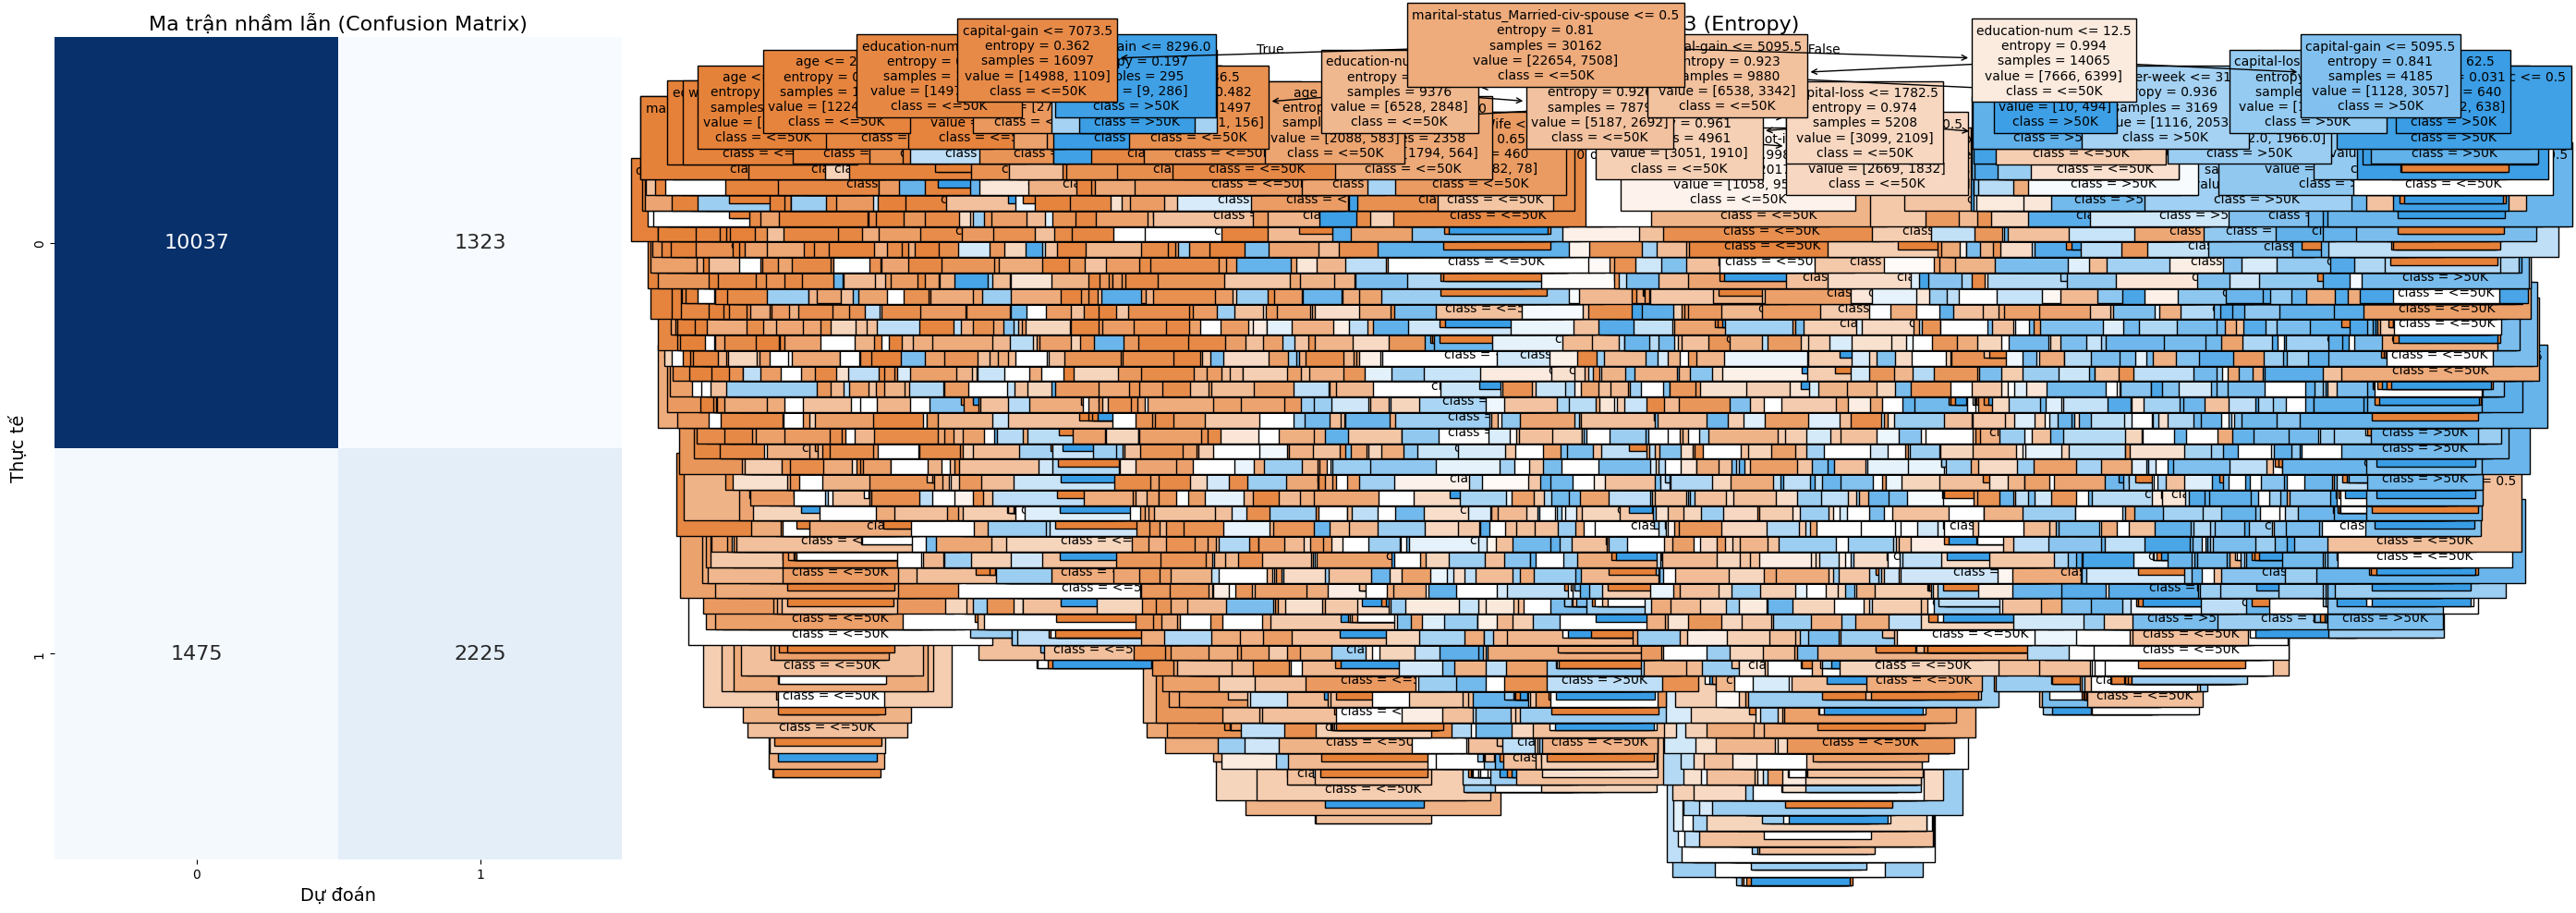

Đã lưu cây vào file 'decision_tree.png'.
Nguyễn Đức Trung - 6351071072


In [11]:
# bài 2 câu 7 trang 15 16
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Huấn luyện mô hình ID3
# (Để cây đẹp và lưu ảnh rõ nét, ta để max_depth=5.
# Nếu muốn cây đầy đủ, bạn đổi thành max_depth=None)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=None)
id3_model.fit(X_train, y_train)

# 2. Dự đoán và đánh giá
y_pred_id3 = id3_model.predict(X_test)
conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)
acc_id3 = accuracy_score(y_test, y_pred_id3)

print(f"Độ chính xác ID3: {acc_id3 * 100:.2f}%")

# --- VẼ VÀ LƯU BIỂU ĐỒ ---
# Tạo khung hình lớn
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})

# A. Vẽ Ma trận nhầm lẫn (Heatmap)
sns.heatmap(conf_matrix_id3, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False,
            annot_kws={"size": 16})
ax[0].set_title("Ma trận nhầm lẫn (Confusion Matrix)", fontsize=16)
ax[0].set_xlabel("Dự đoán", fontsize=14)
ax[0].set_ylabel("Thực tế", fontsize=14)

# B. Vẽ Cây quyết định
plot_tree(id3_model,
          feature_names=X_encoded.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          fontsize=10,
          ax=ax[1])
ax[1].set_title("Mô hình Cây quyết định ID3 (Entropy)", fontsize=16)

# --- LƯU ẢNH ---
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=100)  # Lưu file ảnh chất lượng tốt
plt.show()

print("Đã lưu cây vào file 'decision_tree.png'.")
print("Nguyễn Đức Trung - 6351071072")

Độ chính xác CART: 84.06%


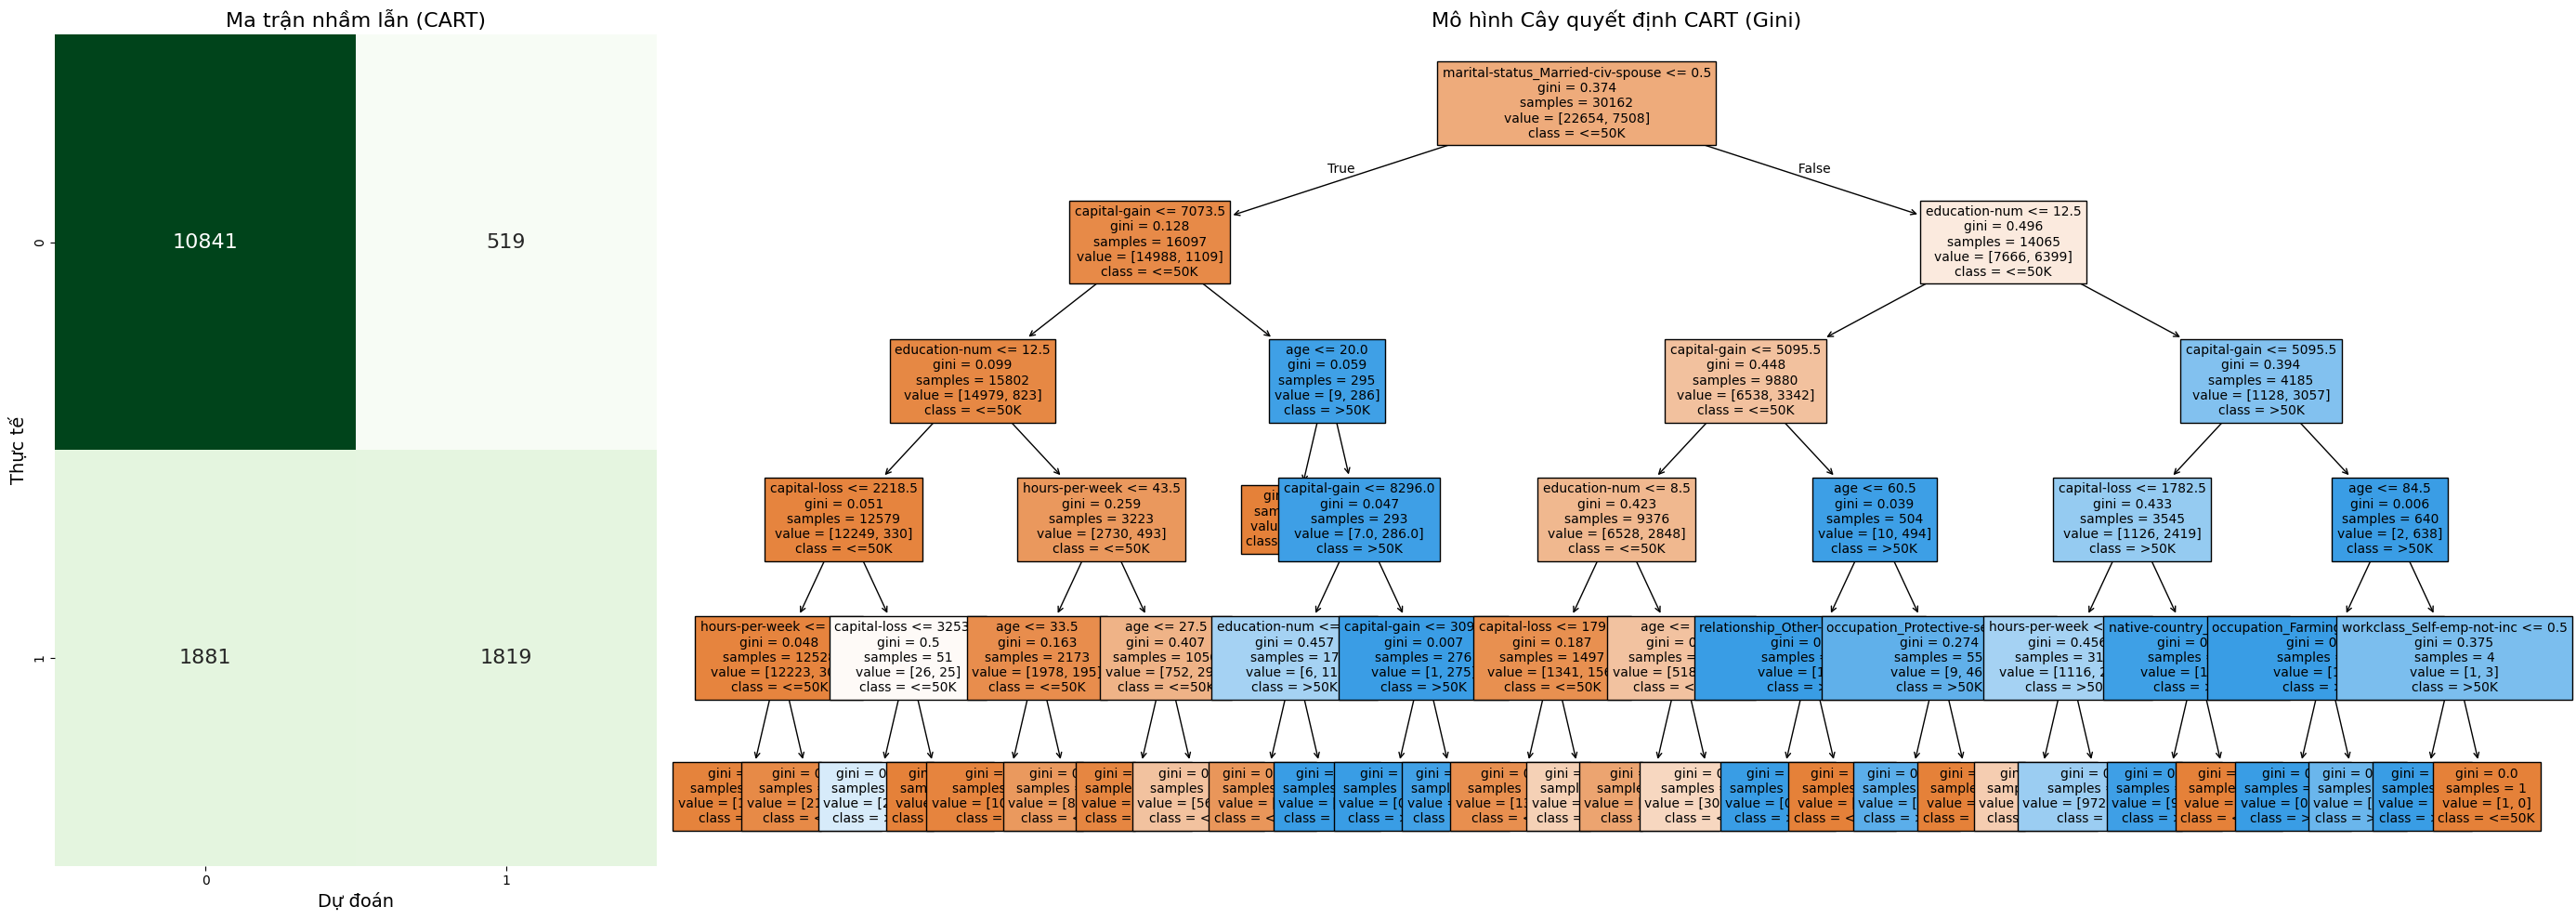

Đã lưu cây CART vào file 'cart_tree.png'.
Nguyễn Đức Trung - 6351071072


In [12]:
# bài 2 câu 8 trang 15 16
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Khởi tạo và Huấn luyện mô hình CART (criterion='gini')
# CART sử dụng chỉ số Gini làm tiêu chuẩn phân chia
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
cart_model.fit(X_train, y_train)

# 2. Dự đoán kết quả trên tập Test
y_pred_cart = cart_model.predict(X_test)

# 3. Đánh giá kết quả
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)
acc_cart = accuracy_score(y_test, y_pred_cart)

print(f"Độ chính xác CART: {acc_cart * 100:.2f}%")

# --- VẼ VÀ LƯU BIỂU ĐỒ (Tương tự câu 7) ---
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})

# A. Vẽ Ma trận nhầm lẫn (Heatmap)
sns.heatmap(conf_matrix_cart, annot=True, fmt='d', cmap='Greens', ax=ax[0], cbar=False,
            annot_kws={"size": 16}) # Đổi màu xanh lá (Greens) để khác biệt với ID3
ax[0].set_title("Ma trận nhầm lẫn (CART)", fontsize=16)
ax[0].set_xlabel("Dự đoán", fontsize=14)
ax[0].set_ylabel("Thực tế", fontsize=14)

# B. Vẽ Cây quyết định CART
plot_tree(cart_model,
          feature_names=X_encoded.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          fontsize=10,
          ax=ax[1])
ax[1].set_title("Mô hình Cây quyết định CART (Gini)", fontsize=16)

# --- LƯU ẢNH ---
plt.tight_layout()
# Lưu file với tên khác để không bị đè lên file của câu 7
plt.savefig('cart_tree.png', dpi=100)
plt.show()

print("Đã lưu cây CART vào file 'cart_tree.png'.")
print("Nguyễn Đức Trung - 6351071072")

Kết quả mô hình Naïve Bayes:
------------------------------
Độ chính xác (Accuracy): 82.20%
Ma trận nhầm lẫn:
[[9686 1674]
 [1007 2693]]


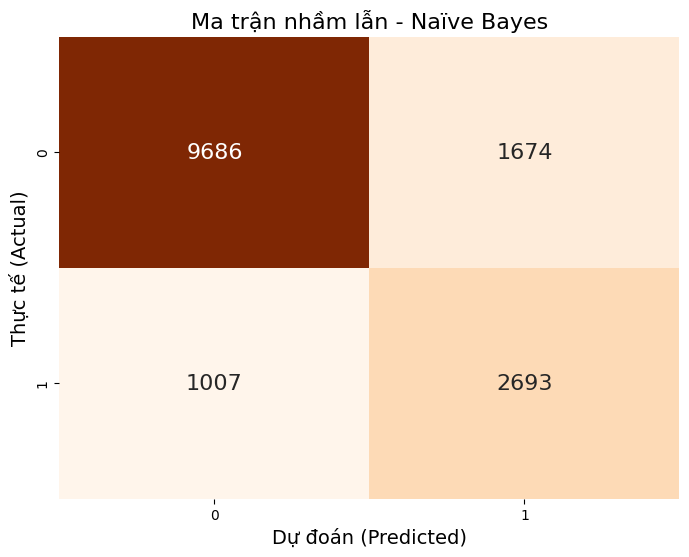

Nguyễn Đức Trung - 6351071072


In [13]:
# bài 2 câu 9 trang 15 16
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Khởi tạo và Huấn luyện mô hình Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 2. Dự đoán kết quả trên tập Test
y_pred_nb = nb_model.predict(X_test)

# 3. Đánh giá kết quả
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Kết quả mô hình Naïve Bayes:")
print("-" * 30)
print(f"Độ chính xác (Accuracy): {acc_nb * 100:.2f}%")
print("Ma trận nhầm lẫn:")
print(conf_matrix_nb)

# --- VẼ BIỂU ĐỒ HEATMAP ---
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            annot_kws={"size": 16}) # Dùng màu cam (Oranges) cho khác biệt
plt.title("Ma trận nhầm lẫn - Naïve Bayes", fontsize=16)
plt.xlabel("Dự đoán (Predicted)", fontsize=14)
plt.ylabel("Thực tế (Actual)", fontsize=14)
plt.show()

print("Nguyễn Đức Trung - 6351071072")

BẢNG SO SÁNH ĐỘ CHÍNH XÁC CÁC MÔ HÌNH:
----------------------------------------
           Model  Accuracy
1    CART (Gini)  0.840637
2    Naïve Bayes  0.821979
0  ID3 (Entropy)  0.814210
----------------------------------------


/tmp/ipython-input-1958063409.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')


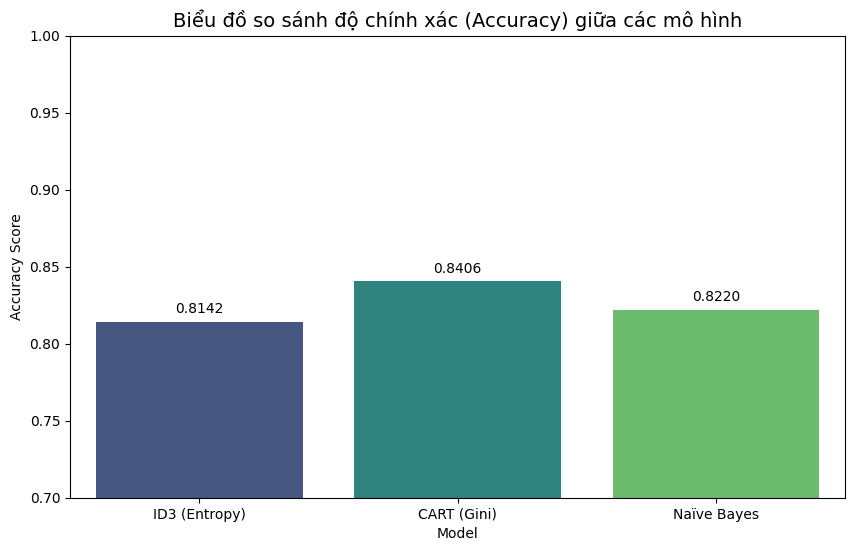


>>> KẾT LUẬN: Mô hình hoạt động tốt nhất là CART (Gini) với độ chính xác 84.06%
Nguyễn Đức Trung - 6351071072


In [14]:
# bài 2 câu 10 trang 15 16
# 1. Tổng hợp kết quả từ các biến đã lưu ở các câu trước
model_comparison = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [acc_id3, acc_cart, acc_nb]
})

# 2. Hiển thị bảng số liệu so sánh
print("BẢNG SO SÁNH ĐỘ CHÍNH XÁC CÁC MÔ HÌNH:")
print("-" * 40)
# Sắp xếp giảm dần để xem mô hình nào tốt nhất
print(model_comparison.sort_values(by='Accuracy', ascending=False))
print("-" * 40)

# 3. Vẽ biểu đồ cột để so sánh trực quan
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ cột
barplot = sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')

# Thêm nhãn số liệu lên đầu mỗi cột
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Thiết lập trục Y từ 0.7 đến 1.0 để thấy rõ sự chênh lệch (vì các mô hình đều khá tốt)
plt.ylim(0.7, 1.0)
plt.title("Biểu đồ so sánh độ chính xác (Accuracy) giữa các mô hình", fontsize=14)
plt.ylabel("Accuracy Score")
plt.show()

# Đưa ra kết luận tự động
best_model = model_comparison.loc[model_comparison['Accuracy'].idxmax()]
print(f"\n>>> KẾT LUẬN: Mô hình hoạt động tốt nhất là {best_model['Model']} "
      f"với độ chính xác {best_model['Accuracy']*100:.2f}%")

print("Nguyễn Đức Trung - 6351071072")